In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_data = pd.read_csv('trainset.csv')
test_data = pd.read_csv('testset.csv')


### PREPROCESSING

In [3]:
data = train_data.dropna()
test_data = test_data.dropna()

In [4]:
print(test_data.info())

# Check for missing values
print(test_data.isnull().sum())

# Display first few rows of the train set
print(test_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11917 entries, 0 to 11916
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          11917 non-null  int64  
 1   job          11917 non-null  object 
 2   marital      11917 non-null  object 
 3   education    11917 non-null  object 
 4   housing      11917 non-null  object 
 5   loan         11917 non-null  object 
 6   contact      11917 non-null  object 
 7   month        11917 non-null  object 
 8   day_of_week  11917 non-null  object 
 9   duration     11917 non-null  int64  
 10  campaign     11917 non-null  int64  
 11  pdays        11917 non-null  int64  
 12  poutcome     11917 non-null  object 
 13  nr.employed  11917 non-null  float64
 14  Subscribed   11917 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.4+ MB
None
age            0
job            0
marital        0
education      0
housing        0
loan           0
contact

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


X = train_data.drop('Subscribed', axis=1)
y = train_data['Subscribed']

# Label encode binary target variable 'Subscribed'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical variables using one-hot encoding
categorical_columns = ['job', 'marital',  'poutcome','contact']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)






### EDUCATION 

In [6]:
education_mapping = {
    'unknown': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}

# Replace 'education' column with the encoded values
X['education'] = X['education'].map(education_mapping)

### LABEL ENCODING

In [7]:
label_encoder = LabelEncoder()
for column in ['housing', 'loan', 'month', 'day_of_week']:
    X[column] = label_encoder.fit_transform(X[column])

In [8]:
X

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,nr.employed,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,poutcome_nonexistent,poutcome_success,contact_telephone
0,41,1,2,0,6,1,1575,1,999,5191.0,...,0,0,0,0,0,0,0,1,0,1
1,49,7,2,0,6,1,1042,1,999,5191.0,...,0,0,0,0,1,0,0,1,0,1
2,49,3,0,0,6,1,1467,1,999,5191.0,...,0,1,0,0,1,0,0,1,0,1
3,41,6,2,0,6,1,579,1,999,5191.0,...,0,1,0,0,1,0,0,1,0,1
4,45,3,2,0,6,1,461,1,999,5191.0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29266,49,0,0,0,7,0,288,1,999,5195.8,...,0,0,0,0,1,0,0,0,0,0
29267,34,7,1,1,7,0,114,5,999,5195.8,...,0,0,0,0,0,1,0,1,0,1
29268,29,6,0,0,7,0,161,3,999,5195.8,...,0,1,0,0,0,1,0,1,0,0
29269,57,3,0,2,7,0,150,2,999,5195.8,...,0,0,0,0,1,0,0,1,0,0


In [9]:
scaler = StandardScaler()
numerical_columns = ['age', 'duration', 'pdays', 'nr.employed']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


### preprocessing the test data 

In [10]:

Xt = test_data.drop('Subscribed', axis=1)
yt = test_data['Subscribed']

# Label encode binary target variable 'Subscribed'
label_encoder = LabelEncoder()
yt = label_encoder.fit_transform(yt)

# Encode categorical variables using one-hot encoding
categorical_columns = ['job', 'marital',  'poutcome','contact']
Xt = pd.get_dummies(Xt, columns=categorical_columns, drop_first=True)
education_mapping = {
    'unknown': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}

# Replace 'education' column with the encoded values
Xt['education'] = Xt['education'].map(education_mapping)
label_encoder = LabelEncoder()
for column in ['housing', 'loan', 'month', 'day_of_week']:
    Xt[column] = label_encoder.fit_transform(Xt[column])
scaler = StandardScaler()
numerical_columns = ['age', 'duration', 'pdays', 'nr.employed']
Xt[numerical_columns] = scaler.fit_transform(Xt[numerical_columns])

In [11]:
Xt

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,nr.employed,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,poutcome_nonexistent,poutcome_success,contact_telephone
0,1.799697,7,0,0,8,0,2.162250,2,0.334309,-1.146758,...,0,0,0,0,1,0,0,1,0,0
1,0.747084,4,2,0,8,0,-0.463246,2,0.334309,-1.146758,...,0,0,0,0,0,1,0,1,0,0
2,-0.305529,7,0,0,8,0,0.467653,1,0.334309,-1.146758,...,0,0,0,0,1,0,0,0,0,0
3,2.447459,1,2,0,8,1,-0.485840,1,0.334309,-1.146758,...,0,0,0,0,1,0,0,1,0,0
4,1.637757,1,0,0,8,1,-0.634965,1,0.334309,-1.146758,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,-0.305529,7,0,0,7,0,0.069987,2,0.334309,-2.262609,...,0,0,0,0,1,0,0,1,0,0
11913,-0.872321,1,2,0,7,0,-0.571700,1,-2.982070,-2.262609,...,0,0,1,0,0,1,0,0,1,0
11914,0.504173,6,0,0,7,0,0.652929,1,0.334309,-2.262609,...,0,0,0,0,1,0,0,1,0,0
11915,1.313876,7,2,0,7,0,-0.223743,2,0.334309,-2.262609,...,0,0,0,0,1,0,0,1,0,0


### APPLYING THE REGRESSION MODEL AND THE DECISION TREE

C:\Users\majid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Model:
Accuracy: 0.8198372073508433
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.89     10473
           1       0.40      1.00      0.57      1444

    accuracy                           0.82     11917
   macro avg       0.70      0.90      0.73     11917
weighted avg       0.93      0.82      0.85     11917

Confusion Matrix:
 [[8326 2147]
 [   0 1444]]

Logistic Regression Model:
Accuracy: 0.8977930687253504
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     10473
           1       0.57      0.67      0.61      1444

    accuracy                           0.90     11917
   macro avg       0.76      0.80      0.78     11917
weighted avg       0.91      0.90      0.90     11917

Confusion Matrix:
 [[9733  740]
 [ 478  966]]

XGBoost Model:
Accuracy: 0.8295712008055719
Classification Report:
               precision    rec

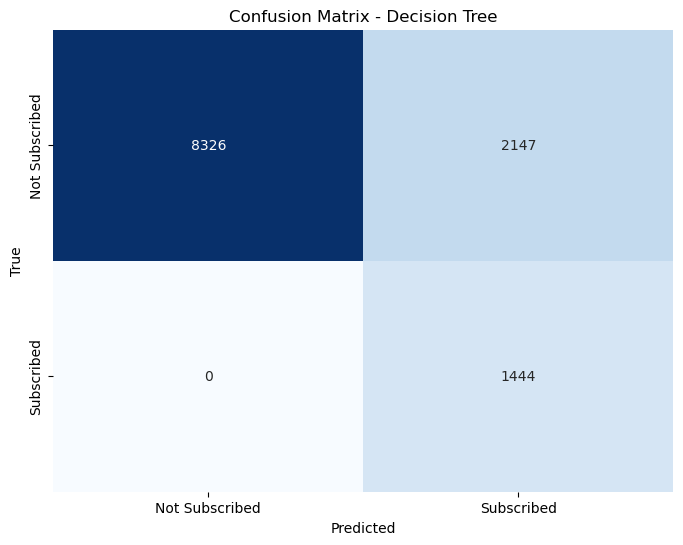

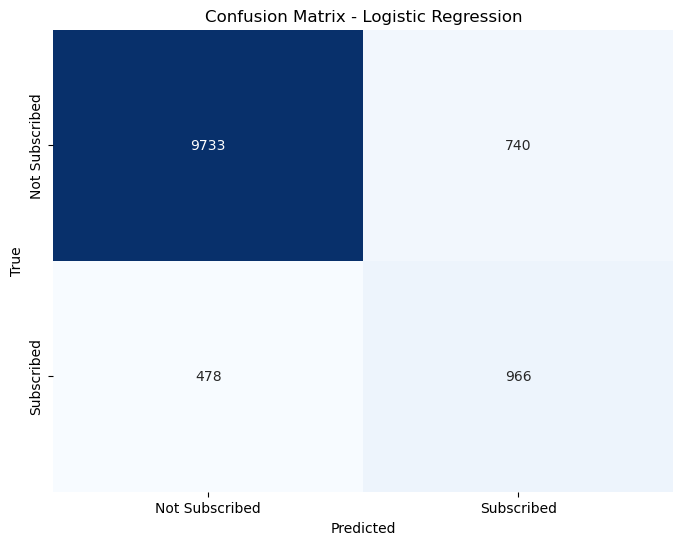

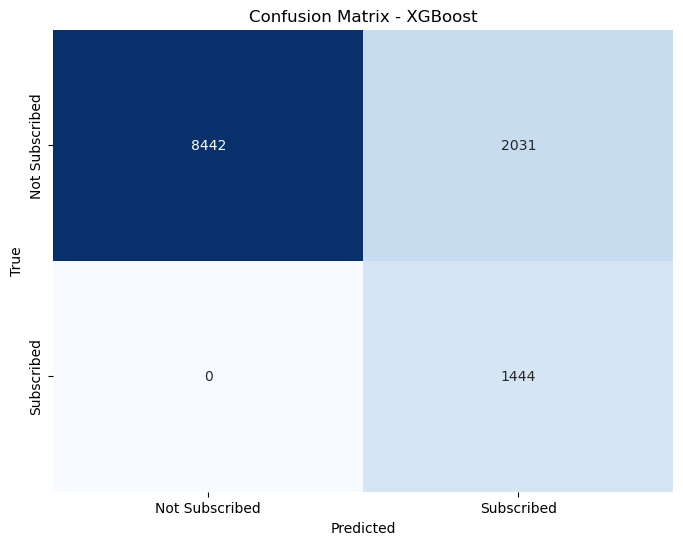

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X, y)

# Train Logistic Regression Model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X, y)

xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X, y)

# Make Predictions on the Test Set
decision_tree_predictions = decision_tree_model.predict(Xt)
logistic_regression_predictions = logistic_regression_model.predict(Xt)
xgboost_predictions = xgboost_model.predict(Xt)

# Evaluate Decision Tree Model
decision_tree_accuracy = accuracy_score(yt, decision_tree_predictions)
decision_tree_report = classification_report(yt, decision_tree_predictions)
decision_tree_conf_matrix = confusion_matrix(yt, decision_tree_predictions)

# Evaluate Logistic Regression Model
logistic_regression_accuracy = accuracy_score(yt, logistic_regression_predictions)
logistic_regression_report = classification_report(yt, logistic_regression_predictions)
logistic_regression_conf_matrix = confusion_matrix(yt, logistic_regression_predictions)

# Evaluate XGBoost Model
xgboost_accuracy = accuracy_score(yt, xgboost_predictions)
xgboost_report = classification_report(yt, xgboost_predictions)
xgboost_conf_matrix = confusion_matrix(yt, xgboost_predictions)

# Print results
print("Decision Tree Model:")
print(f'Accuracy: {decision_tree_accuracy}')
print('Classification Report:\n', decision_tree_report)
print('Confusion Matrix:\n', decision_tree_conf_matrix)

print("\nLogistic Regression Model:")
print(f'Accuracy: {logistic_regression_accuracy}')
print('Classification Report:\n', logistic_regression_report)
print('Confusion Matrix:\n', logistic_regression_conf_matrix)

print("\nXGBoost Model:")
print(f'Accuracy: {xgboost_accuracy}')
print('Classification Report:\n', xgboost_report)
print('Confusion Matrix:\n', xgboost_conf_matrix)

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_regression_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(xgboost_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()